# Data Preprocessing

In [ ]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/female

Streaming output truncated to the last 5000 lines.
  inflating: female/female_005065.jpg  
  inflating: __MACOSX/female/._female_005065.jpg  
  inflating: female/female_003400.jpg  
  inflating: __MACOSX/female/._female_003400.jpg  
  inflating: female/female_006578.jpg  
  inflating: __MACOSX/female/._female_006578.jpg  
  inflating: female/female_001571.jpg  
  inflating: __MACOSX/female/._female_001571.jpg  
  inflating: female/female_005717.jpg  
  inflating: __MACOSX/female/._female_005717.jpg  
  inflating: female/female_004409.jpg  
  inflating: __MACOSX/female/._female_004409.jpg  
  inflating: female/female_003366.jpg  
  inflating: __MACOSX/female/._female_003366.jpg  
  inflating: female/female_000647.jpg  
  inflating: __MACOSX/female/._female_000647.jpg  
  inflating: female/female_001559.jpg  
  inflating: __MACOSX/female/._female_001559.jpg  
  inflating: female/female_002050.jpg  
  inflating: __MACOSX/female/._female_002050.jpg  
  inflating: female/female_004421.jpg  

In [ ]:
!unzip /content/gdrive/MyDrive/male

Streaming output truncated to the last 5000 lines.
  inflating: male/male_006574.jpg    
  inflating: __MACOSX/male/._male_006574.jpg  
  inflating: male/male_000105.jpg    
  inflating: __MACOSX/male/._male_000105.jpg  
  inflating: male/male_004363.jpg    
  inflating: __MACOSX/male/._male_004363.jpg  
  inflating: male/male_002712.jpg    
  inflating: __MACOSX/male/._male_002712.jpg  
  inflating: male/male_004834.jpg    
  inflating: __MACOSX/male/._male_004834.jpg  
  inflating: male/male_003183.jpg    
  inflating: __MACOSX/male/._male_003183.jpg  
  inflating: male/male_001794.jpg    
  inflating: __MACOSX/male/._male_001794.jpg  
  inflating: male/male_006945.jpg    
  inflating: __MACOSX/male/._male_006945.jpg  
  inflating: male/male_005280.jpg    
  inflating: __MACOSX/male/._male_005280.jpg  
  inflating: male/male_006789.jpg    
  inflating: __MACOSX/male/._male_006789.jpg  
  inflating: male/male_006951.jpg    
  inflating: __MACOSX/male/._male_006951.jpg  
  inflating: m

In [ ]:
fpath = sorted(glob('/content/female/*.jpg'))
mpath = sorted(glob('/content/male/*.jpg'))

In [ ]:
fpath

['/content/female/female_000000.jpg',
 '/content/female/female_000001.jpg',
 '/content/female/female_000002.jpg',
 '/content/female/female_000003.jpg',
 '/content/female/female_000004.jpg',
 '/content/female/female_000005.jpg',
 '/content/female/female_000006.jpg',
 '/content/female/female_000007.jpg',
 '/content/female/female_000008.jpg',
 '/content/female/female_000009.jpg',
 '/content/female/female_000010.jpg',
 '/content/female/female_000011.jpg',
 '/content/female/female_000012.jpg',
 '/content/female/female_000013.jpg',
 '/content/female/female_000014.jpg',
 '/content/female/female_000018.jpg',
 '/content/female/female_000019.jpg',
 '/content/female/female_000020.jpg',
 '/content/female/female_000021.jpg',
 '/content/female/female_000024.jpg',
 '/content/female/female_000025.jpg',
 '/content/female/female_000026.jpg',
 '/content/female/female_000028.jpg',
 '/content/female/female_000030.jpg',
 '/content/female/female_000031.jpg',
 '/content/female/female_000032.jpg',
 '/content/f

In [ ]:
print("number of images in female folder: ", len(fpath))
print("number of images in male folder: ", len(mpath))

number of images in female folder:  4762
number of images in male folder:  5399


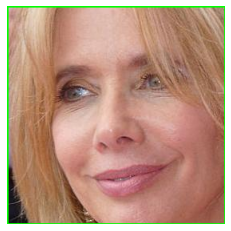

In [ ]:
# Step 1 : Read Image and Convert to RGB
imr = cv2.imread(fpath[0]) # reads the first image in BGR

image_rgb = cv2.cvtColor(imr, cv2.COLOR_BGR2RGB)

# Step 2 : Apply Haar Cascade Classifier

haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# DEBUGGING!!!!! cv2.data.haarcascades is property given by cv, NECESSARY to append before xml file

gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

faces_list = haar.detectMultiScale(gray, 1.5, 5)
for x,y,w,h in faces_list:
    cv2.rectangle(image_rgb,(x,y),(x+w,y+h),(0,255,0),2) # rectangle(img src, (top, left), (bottom, right), color bgr, border px)

    # Step 3 : Crop Faces
    roi = image_rgb[y:y+w, x:x+h] # roi = region of interest 

    plt.imshow(roi)
    plt.axis('off')
    plt.show()


# Step 4 : Save Image

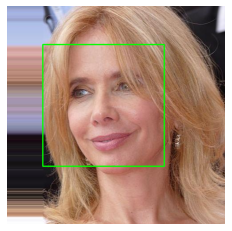

In [ ]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

### Crop all **female** images

In [ ]:
# for i in range(len(fpath)):
#     try:
#         image = cv2.imread(fpath[i])
#         image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#         gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
#         faces_list = haar.detectMultiScale(gray, 1.5, 5)

#         for x,y,w,h in faces_list:
#             roi = image_rgb[y: y+w, x: x+h]
#             cv2.imwrite(f'/content/drive/MyDrive/cropped/female/female_{i}.jpg', roi)
#             print("SUCCESS BITCHES")
#     except:
#         print("UNABLE TO PROCESS :( ")

### Crop all **male** images

In [ ]:
# for i in range(len(mpath)):
#     try:
#         image = cv2.imread(mpath[i])
#         image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#         gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
#         faces_list = haar.detectMultiScale(gray, 1.5, 5)

#         for x,y,w,h in faces_list:
#             roi = image_rgb[y: y+w, x: x+h]
#             cv2.imwrite(f'/content/drive/MyDrive/cropped/male/male{i}.jpg', roi)
#             print("SUCCESS BITCHES")
#     except:
#         print("UNABLE TO PROCESS :( ")

# Phase 2: Exploratory Data Analysis (EDA)

In [ ]:
# Seaborn is a library built on top of matplotlib for data visualization and EDA
import numpy as np
import pandas as pd # used for analysis 

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# computer vision
import cv2

from glob import glob

In [ ]:
# extract path of male + female images and add to a list
fpath = sorted(glob('/content/female/*.jpg'))
mpath = sorted(glob('/content/male/*.jpg'))

In [ ]:
# create 2 separate dataframes that contains path of female + male
df_female = pd.DataFrame(fpath, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath, columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female, df_male), axis = 0)

df.tail()


,filepath,gender
5394,/content/male/male_006995.jpg,male
5395,/content/male/male_006996.jpg,male
5396,/content/male/male_006997.jpg,male
5397,/content/male/male_006998.jpg,male
5398,/content/male/male_006999.jpg,male


In [ ]:
df.shape # not all images might be extracted since haar cascade classifier is not completely accurate

(10161, 2)

Extracting size of every image

In [ ]:
# since image is square, extract either the width or height
def get_size(path):
    image = cv2.imread(path)
    return image.shape[0]  # since shape return tuple(width, height) index either 0 or 1 since size is same for either

In [ ]:
df['dimension'] = df['filepath'].apply(get_size) 

In [ ]:
df.head()

,filepath,gender,dimension
0,/content/female/female_000000.jpg,female,489
1,/content/female/female_000001.jpg,female,425
2,/content/female/female_000002.jpg,female,500
3,/content/female/female_000003.jpg,female,130
4,/content/female/female_000004.jpg,female,262


## EDA 
1. Distribution of Male and Female
    - Bar Chart
    - Pi Chart
2. Distribution of size of all images
    - Histogram
    - Box Plot
    - Split by gender
3. Decide resize factor of width and height depending on above charts
4. Remove the few images that are having too less of a size 

In [ ]:
# 1. Distribution of Male and Female
    # - Bar Chart
    # - Pi Chart
unique_gender = df['gender'].value_counts()
unique_gender

male      5399
female    4762
Name: gender, dtype: int64

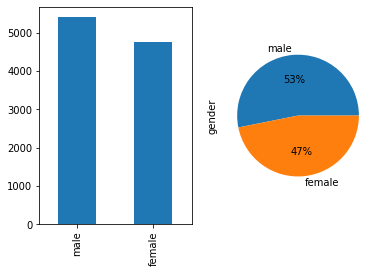

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2) # ax holds the index in which graph shows up in subplot
# - Bar Chart
unique_gender.plot(kind='bar', ax=ax[0])
# - Pi Chart
unique_gender.plot(kind='pie', ax=ax[1], autopct='%0.0f%%')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


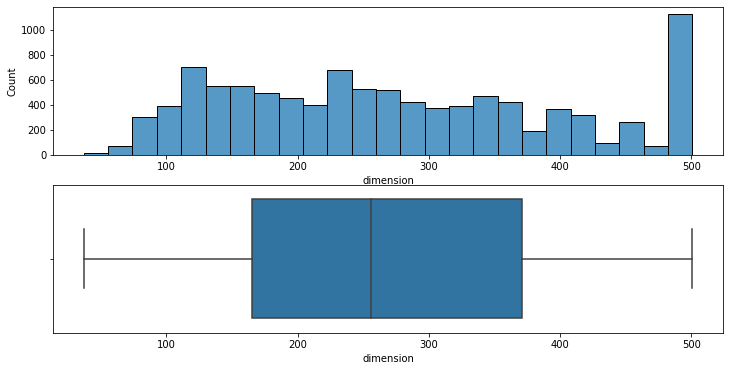

In [ ]:
# 2. Distribution of size of all images
    # - Histogram
    # - Box Plot
    # - Split by gender
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()
# df['dimension']

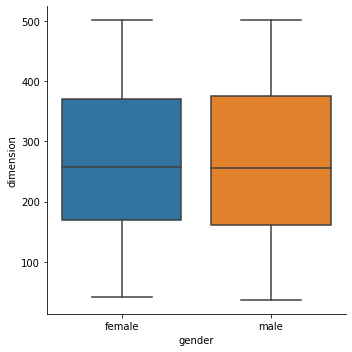

In [ ]:
sns.catplot(data=df, x='gender', y='dimension', kind='box')
plt.show()

### EDA 
- Almost equal distribution of gender and dimensions (numbers)
- Most images have dimensions above 200


- **Only consider dimensions more than 180**
    - min dimensions in both catplot and boxplot
- **Resize the images into 280x280** 
    - That is where the median line is in the catplot

In [ ]:
df_filter = df.query('dimension > 180')
df_filter.shape

(7253, 3)

In [ ]:
df_filter['gender'].value_counts(normalize=True)

male      0.526127
female    0.473873
Name: gender, dtype: float64

### Structure the Image
- 180 x 180

In [ ]:
def structuring(path):
    try:
        # step 1: read image
        image = cv2.imread(path)
        # step 2: convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # step 3: resize into 180 x 180
        size = gray.shape[0]
        if size >= 180:
            # INTER_AREA = shrink
            gray_resize = cv2.resize(gray, (180,180), cv2.INTER_AREA)
        else:
            # INTER_CUBIC = enlarge
            gray_resize = cv2.resize(gray, (180,180), cv2.INTER_CUBIC)
        # step 4: flatten the image (it is not recommended to store data in 2d or 3d hence flattening is required to turn into 1d)
        flatten_image = gray_resize.flatten()
        return flatten_image
    except:
        return None


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [ ]:
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images to 180 x 180

In [ ]:
df_filter.head()

,filepath,gender,dimension,data
0,/content/female/female_000000.jpg,female,489,"[154, 154, 154, 154, 154, 154, 154, 154, 154, ..."
1,/content/female/female_000001.jpg,female,425,"[238, 238, 238, 237, 237, 237, 237, 238, 238, ..."
2,/content/female/female_000002.jpg,female,500,"[181, 181, 181, 181, 181, 181, 181, 182, 183, ..."
4,/content/female/female_000004.jpg,female,262,"[13, 11, 8, 9, 12, 13, 14, 15, 12, 12, 16, 9, ..."
6,/content/female/female_000006.jpg,female,280,"[213, 214, 213, 211, 209, 209, 208, 207, 206, ..."


In [ ]:
data = df_filter['data'].apply(pd.Series) # creates individuals columns for each data value 

In [ ]:
data.columns = [f'pixel_{i}' for i in data.columns]

In [ ]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_32390,pixel_32391,pixel_32392,pixel_32393,pixel_32394,pixel_32395,pixel_32396,pixel_32397,pixel_32398,pixel_32399
0,154,154,154,154,154,154,154,154,154,154,...,155,161,166,165,165,164,163,166,170,174
1,238,238,238,237,237,237,237,238,238,238,...,32,32,31,30,31,32,31,29,31,29
2,181,181,181,181,181,181,181,182,183,183,...,18,18,18,18,18,18,18,18,18,18
4,13,11,8,9,12,13,14,15,12,12,...,245,250,220,176,173,35,191,224,179,203
6,213,214,213,211,209,209,208,207,206,205,...,191,191,188,186,188,192,195,201,208,214


### Data Normalization 

In [ ]:
# dividing above data by 255 since max pixels possible is 255
data = data/255.0
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_32390,pixel_32391,pixel_32392,pixel_32393,pixel_32394,pixel_32395,pixel_32396,pixel_32397,pixel_32398,pixel_32399
0,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,...,0.607843,0.631373,0.650980,0.647059,0.647059,0.643137,0.639216,0.650980,0.666667,0.682353
1,0.933333,0.933333,0.933333,0.929412,0.929412,0.929412,0.929412,0.933333,0.933333,0.933333,...,0.125490,0.125490,0.121569,0.117647,0.121569,0.125490,0.121569,0.113725,0.121569,0.113725
2,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.713725,0.717647,0.717647,...,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588
4,0.050980,0.043137,0.031373,0.035294,0.047059,0.050980,0.054902,0.058824,0.047059,0.047059,...,0.960784,0.980392,0.862745,0.690196,0.678431,0.137255,0.749020,0.878431,0.701961,0.796078
6,0.835294,0.839216,0.835294,0.827451,0.819608,0.819608,0.815686,0.811765,0.807843,0.803922,...,0.749020,0.749020,0.737255,0.729412,0.737255,0.752941,0.764706,0.788235,0.815686,0.839216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,...,0.564706,0.564706,0.564706,0.564706,0.564706,0.564706,0.564706,0.564706,0.564706,0.564706
5395,0.301961,0.301961,0.301961,0.301961,0.301961,0.301961,0.301961,0.301961,0.301961,0.301961,...,0.274510,0.247059,0.250980,0.254902,0.235294,0.290196,0.301961,0.243137,0.239216,0.270588
5396,0.733333,0.733333,0.733333,0.733333,0.733333,0.733333,0.733333,0.733333,0.733333,0.733333,...,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353
5397,0.964706,0.964706,0.960784,0.964706,0.968627,0.964706,0.964706,0.964706,0.964706,0.964706,...,0.686275,0.686275,0.686275,0.682353,0.678431,0.678431,0.678431,0.674510,0.674510,0.670588


In [ ]:
data['gender'] = df_filter['gender']

In [ ]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_32391,pixel_32392,pixel_32393,pixel_32394,pixel_32395,pixel_32396,pixel_32397,pixel_32398,pixel_32399,gender
0,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,...,0.631373,0.650980,0.647059,0.647059,0.643137,0.639216,0.650980,0.666667,0.682353,female
1,0.933333,0.933333,0.933333,0.929412,0.929412,0.929412,0.929412,0.933333,0.933333,0.933333,...,0.125490,0.121569,0.117647,0.121569,0.125490,0.121569,0.113725,0.121569,0.113725,female
2,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.713725,0.717647,0.717647,...,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,female
4,0.050980,0.043137,0.031373,0.035294,0.047059,0.050980,0.054902,0.058824,0.047059,0.047059,...,0.980392,0.862745,0.690196,0.678431,0.137255,0.749020,0.878431,0.701961,0.796078,female
6,0.835294,0.839216,0.835294,0.827451,0.819608,0.819608,0.815686,0.811765,0.807843,0.803922,...,0.749020,0.737255,0.729412,0.737255,0.752941,0.764706,0.788235,0.815686,0.839216,female


In [ ]:
### Removing missing values

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(7253, 32401)

### Saving the data for future study

In [ ]:
import pickle
pickle.dump(data, open('/content/data_images_180_180.pickle', mode='wb')) # mode of operation: wb = write in bytes 

# Phase 3: Feature Extraction 

Eigenfaces approach is a principal component analysis method, in which a small set of characteristic pictures are used to describe the variation between face images. Goal is to find out the eigenvectors (eigenfaces) of the covariance matrix of the distribution, spanned by a training set of face images. Later, every face image is represented by a linear combination of these eigenvectors. Evaluation of these eigenvectors is quite difficult for typical image sizes but, an approximation can be made. Recognition is performed by projecting a new image into the subspace spanned by the eigenfaces and then classifying the face by comparing its position in face space with the positions of known individuals.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

# Eigen Face
from sklearn.decomposition import PCA # principal component analysis

# Saving data
import pickle

In [ ]:
# load data
data = pickle.load(open('/content/data_images_180_180.pickle', mode='rb'))

In [ ]:
data.head() # normalized between 0-1

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_32391,pixel_32392,pixel_32393,pixel_32394,pixel_32395,pixel_32396,pixel_32397,pixel_32398,pixel_32399,gender
0,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,0.603922,...,0.631373,0.650980,0.647059,0.647059,0.643137,0.639216,0.650980,0.666667,0.682353,female
1,0.933333,0.933333,0.933333,0.929412,0.929412,0.929412,0.929412,0.933333,0.933333,0.933333,...,0.125490,0.121569,0.117647,0.121569,0.125490,0.121569,0.113725,0.121569,0.113725,female
2,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.713725,0.717647,0.717647,...,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,female
4,0.050980,0.043137,0.031373,0.035294,0.047059,0.050980,0.054902,0.058824,0.047059,0.047059,...,0.980392,0.862745,0.690196,0.678431,0.137255,0.749020,0.878431,0.701961,0.796078,female
6,0.835294,0.839216,0.835294,0.827451,0.819608,0.819608,0.815686,0.811765,0.807843,0.803922,...,0.749020,0.737255,0.729412,0.737255,0.752941,0.764706,0.788235,0.815686,0.839216,female


We need to subtract the mean face from the normalized face: find the mean of each pixel (!!!??) and subtract it from above pixel values

## Eigen Face

In [ ]:
# Mean Face
# only focusing on independent variables since PCA is unsupervised learning (dependent variable (gender) doesn't matter)
X = data.drop('gender', axis=1).values # .values converts data frame to numpy array since it is good to work in arrays

In [ ]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(32400,)

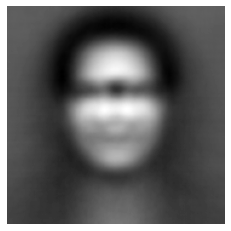

In [ ]:
# visualize mean face
plt.imshow(mean_face.reshape((180,180)), cmap='gray') # use dimensions 180 x 180 = 32400
plt.axis('off')
plt.show()

`ok well i am officially freaked out`

In [ ]:
# subtract data with mean face 
X_transform = X - mean_face # transformed data

In [ ]:
# now we must pass mean face to PCA and obtain eigen faces
# main question in PCA: number of components needed -> apply ELBOW METHOD
# first build out PCA with components
pca = PCA(n_components=None, whiten=True, svd_solver="auto")
pca.fit(X_transform)

PCA(whiten=True)

In [ ]:
# explained variance of each dataframe
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_ # explained_variance_ratio will normalize the values
# cumulative variance
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df) + 1) 

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.293481,0.293481,1
1,0.097295,0.390777,2
2,0.060727,0.451503,3
3,0.055923,0.507427,4
4,0.038986,0.546413,5


In [ ]:
# to find optimal components, you need to visualize elbow plot
exp_var_df.set_index('principal_components', inplace=True)

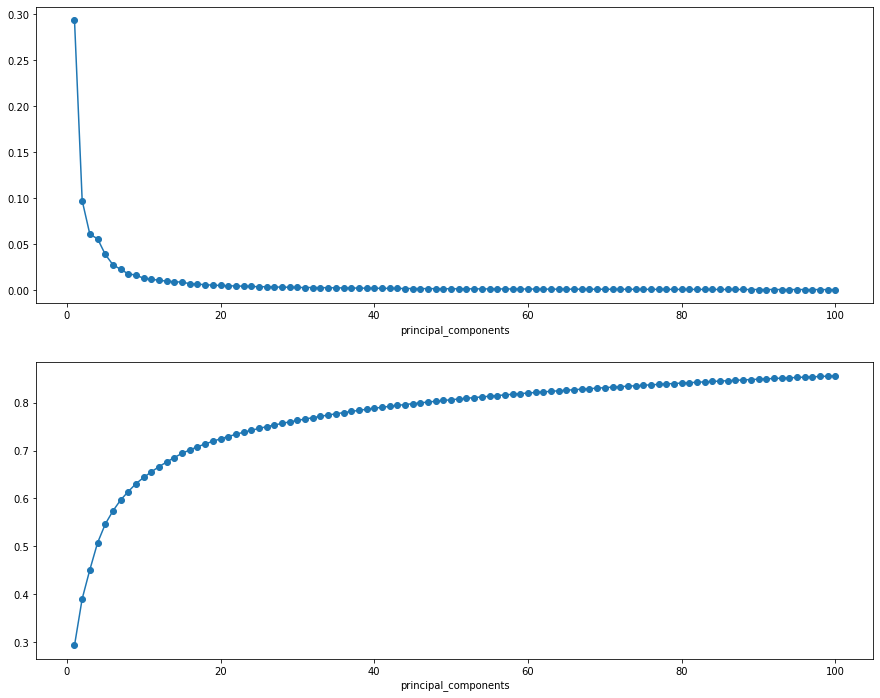

In [ ]:
# visualizing explained variance
fig, ax = plt.subplots(nrows=2, figsize=(15,12)) # 2 rows for explained variance ratio and cum explained variance

exp_var_df['explained_var'].head(100).plot(kind='line', marker='o', ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line', marker='o', ax=ax[1])


From the above plot, it is clear that `**with 50 principal components, we have 80% coverage**`

In [ ]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
pca_data = pca_50.fit_transform(X_transform) # performs fit and transform on transformed data

In [ ]:
pca_data.shape # 7252 images and 50 components
# represents eigen image!!

(7253, 50)

Saving Data & Models

In [ ]:
# since all the data and models are in numpy format, we can use numpy zip to save data
y = data['gender'].values # independent variables -- converting to numpy
np.savez('/content/data_pca_50_components', pca_data, y)

In [ ]:
# saving the model
pca_dict = {'pca': pca_50, 'mean_face': mean_face}

In [ ]:
pickle.dump(pca_dict, open('/content/pca_dict.pickle', mode='wb'))

## Visualize Eigen Image

In [ ]:
# we must inverse transform the eigen image in order to visualize it
pca_data_inv = pca_50.inverse_transform(pca_data)

In [ ]:
pca_data_inv.shape # (images, pixels (180x180))

(7253, 32400)

In [ ]:
eig_img = pca_data_inv[0,:].reshape((180,180)) # : shows all columns
eig_img.shape

(180, 180)

(-0.5, 179.5, 179.5, -0.5)

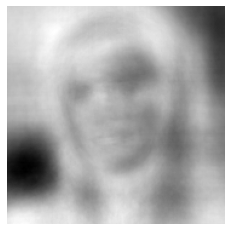

In [ ]:
plt.imshow(eig_img, cmap='gray')
plt.axis('off')

# Training the ML Model

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
# Load numpy array
data = np.load('/content/data_pca_50_components.npz')
data.files # (PCA, y)

['arr_0', 'arr_1']

In [ ]:
data.allow_pickle = True

In [ ]:
X = data['arr_0'] # pca data with 50 components
y = data['arr_1'] # target or dependent variable
print(X.shape, y.shape)

(7253, 50) (7253,)


## Split the data into train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y) 
# test_size: 80% data used for training and 20% used for test size
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
# below total for training and testing images = 7253 which is the shape of total images

(5802, 50) (1451, 50) (5802,) (1451,)


## Training ML Model

In [ ]:
model_svc = SVC(probability=True) # Support Vector Classifier is used widely to train images
param_grid = {'C':[1,10,30,50], 'gamma': [0.1, 0.01, 0.005]}
# as slack variable (C) increases, I get a better fit however too high leads to overfitting

In [ ]:
model_grid = GridSearchCV(model_svc, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

In [ ]:
model_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....................................C=1, gamma=0.1; total time=   6.2s
[CV] END .....................................C=1, gamma=0.1; total time=   6.2s
[CV] END .....................................C=1, gamma=0.1; total time=   6.2s
[CV] END ....................................C=1, gamma=0.01; total time=   4.6s
[CV] END ....................................C=1, gamma=0.01; total time=   4.6s
[CV] END ....................................C=1, gamma=0.01; total time=   4.6s
[CV] END ...................................C=1, gamma=0.005; total time=   4.5s
[CV] END ...................................C=1, gamma=0.005; total time=   4.5s
[CV] END ...................................C=1, gamma=0.005; total time=   4.5s
[CV] END ....................................C=10, gamma=0.1; total time=   5.8s
[CV] END ....................................C=10, gamma=0.1; total time=   5.8s
[CV] END ....................................C=1

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 30, 50], 'gamma': [0.1, 0.01, 0.005]},
             scoring='accuracy', verbose=2)

In [ ]:
model_grid.best_params_

{'C': 10, 'gamma': 0.005}

In [ ]:
model_final = model_grid.best_estimator_

In [ ]:
model_final.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.005,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Model Evaluation 
- Classification Report
- Kappa Value
- AUC Value

In [ ]:
Y_pred = model_final.predict(X_test) # predicted values
Y_pred

array(['male', 'female', 'male', ..., 'female', 'male', 'female'],
      dtype=object)

## Classification Report

In [ ]:
### Classification Report
cr = metrics.classification_report(Y_test, Y_pred, output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
female,0.720859,0.683140,0.701493,688.000000
male,0.727159,0.761468,0.743918,763.000000
accuracy,0.724328,0.724328,0.724328,0.724328
macro avg,0.724009,0.722304,0.722705,1451.000000
weighted avg,0.724172,0.724328,0.723802,1451.000000


### Kappa Score

In [ ]:
metrics.cohen_kappa_score(Y_test, Y_pred)

0.4457537710516164

### AUC (area under cover)

In [ ]:
metrics.roc_auc_score(np.where(Y_test=='male', 1, 0), np.where(Y_pred=='male', 1, 0))

0.7223037123959889

## Save ML Model

In [ ]:
import pickle

In [ ]:
pickle.dump(model_final, open('/content/model_svm.pickle', mode='wb'))

______________________________________________________________________________________________________________________________________

# Make Pipeline

## Loading Data and Models

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import pickle

import matplotlib.pyplot as plt
import cv2

In [ ]:
# Load all models
haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # haar classifier
model_svm = pickle.load(open('/content/model_svm.pickle', mode='rb')) # machine learning model
pca_models = pickle.load(open('/content/pca_dict.pickle', mode='rb')) # pca dictionary

In [ ]:
# splitting pca_models into pca model and mean face
model_pca = pca_models['pca'] # PCA Model
mean_face_arr = pca_models['mean_face'] # Mean Face

## Create Pipeline

In [ ]:
# step-01: read image
img = cv2.imread('/content/getty_test.jpg') # BGR
# step-02: convert into gray scale
gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
# step-03: crop the face (using haar cascase classifier)
faces = haar.detectMultiScale(gray,1.5,3)
predictions = []
for x,y,w,h in faces:
    #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi = gray[y:y+h,x:x+w]
    
    # step-04: normalization (0-1)
    roi = roi / 255.0
    # step-05: resize images (180,180)
    if roi.shape[1] > 180:
        roi_resize = cv2.resize(roi,(180,180),cv2.INTER_AREA)
    else:
        roi_resize = cv2.resize(roi,(180,180),cv2.INTER_CUBIC)
        
    # step-06: Flattening (1x32400)
    roi_reshape = roi_resize.reshape(1,32400)
    # step-07: subtract with mean
    roi_mean = roi_reshape - mean_face_arr # subtract face with mean face
    # step-08: get eigen image (apply roi_mean to pca)
    eigen_image = model_pca.transform(roi_mean)
    # step-09 Eigen Image for Visualization
    eig_img = model_pca.inverse_transform(eigen_image)
    # step-10: pass to ml model (svm) and get predictions
    results = model_svm.predict(eigen_image)
    prob_score = model_svm.predict_proba(eigen_image)
    prob_score_max = prob_score.max()
    
    # step-11: generate report
    text = "%s : %d"%(results[0],prob_score_max*100)
    # defining color based on results
    if results[0] == 'male':
        color = (255,255,0)
    else:
        color = (255,0,255)
        
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.rectangle(img,(x,y-40),(x+w,y),color,-1)
    cv2.putText(img,text,(x,y),cv2.FONT_HERSHEY_PLAIN,3,(255,255,255),5)
    output = {
        'roi':roi,
        'eig_img': eig_img,
        'prediction_name':results[0],
        'score':prob_score_max
    }
    
    predictions.append(output)

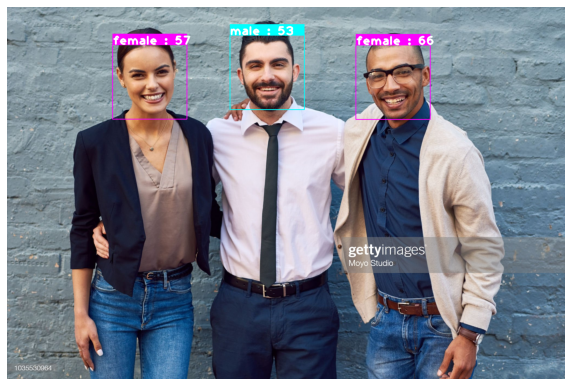

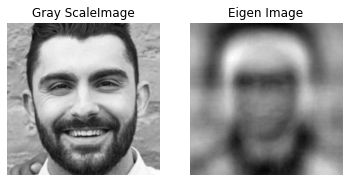

Predicted Gender = male
Predicted score = 53.03 %
----------------------------------------------------------------------------------------------------


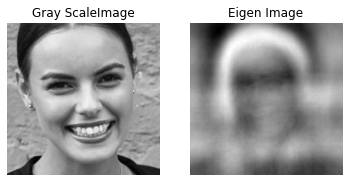

Predicted Gender = female
Predicted score = 57.49 %
----------------------------------------------------------------------------------------------------


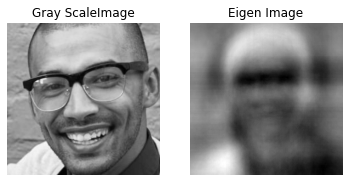

Predicted Gender = female
Predicted score = 66.19 %
----------------------------------------------------------------------------------------------------


In [ ]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## generate report
for i in range(len(predictions)):
    obj_gray = predictions[i]['roi'] #gray scale
    obj_eig = predictions[i]['eig_img'].reshape(180,180) #eigen image
    plt.subplot(1,2,1)
    plt.imshow(obj_gray,cmap='gray')
    plt.title('Gray ScaleImage')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(obj_eig,cmap='gray')
    plt.title('Eigen Image')
    plt.axis('off')
    
    plt.show()
    print('Predicted Gender =',predictions[i]['prediction_name'])
    print('Predicted score = {:,.2f} %'.format(predictions[i]['score']*100))
    
    print('-'*100)

In [ ]:
from google.colab import files
files.download("data_images_180_180.pickle")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("data_pca_50_components.npz")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("model_svm.pickle")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("pca_dict.pickle")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>